In [3]:
import pandas as pd
import numpy as np 
import pickle

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn import tree
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
data = pd.read_csv("C:/Users/moort/GUVI-PROJECTS/ML_Flow/FAANG .csv")
drop_col = ['Revenue', 'Gross Profit', 'Operating Income', 'Total Assets', 'Total Equity','Trailing Twelve Months (TTM) Revenue','Trailing Twelve Months (TTM) EBITDA','Trailing Twelve Months (TTM) Earnings','Cash Ratio']
data = data.drop(columns=drop_col)
data['Date'] = pd.to_datetime(data['Date'])
df_Netflix = data[data['Company']=='Netflix']

In [ ]:
df_Netflix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4982 entries, 18073 to 23054
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Company                   4982 non-null   object        
 1   Ticker                    4982 non-null   object        
 2   Date                      4982 non-null   datetime64[ns]
 3   Open                      4982 non-null   float64       
 4   High                      4982 non-null   float64       
 5   Low                       4982 non-null   float64       
 6   Close                     4982 non-null   float64       
 7   Adj Close                 4982 non-null   float64       
 8   Volume                    4982 non-null   int64         
 9   Market Cap                4982 non-null   float64       
 10  PE Ratio                  4982 non-null   float64       
 11  Beta                      0 non-null      float64       
 12  EPS                 

TypeError: 'NoneType' object is not subscriptable

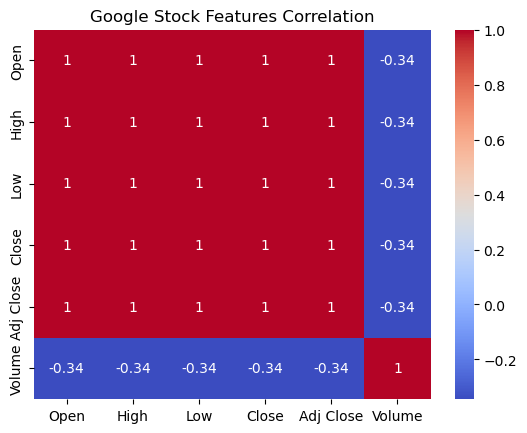

In [ ]:
df_Net = df_Netflix[['Open','High','Low','Close','Adj Close','Volume']]
corr_mat = df_Net.corr()
sns.heatmap(corr_mat, cmap='coolwarm', annot=True)
plt.title("Google Stock Features Correlation")
plt.show()

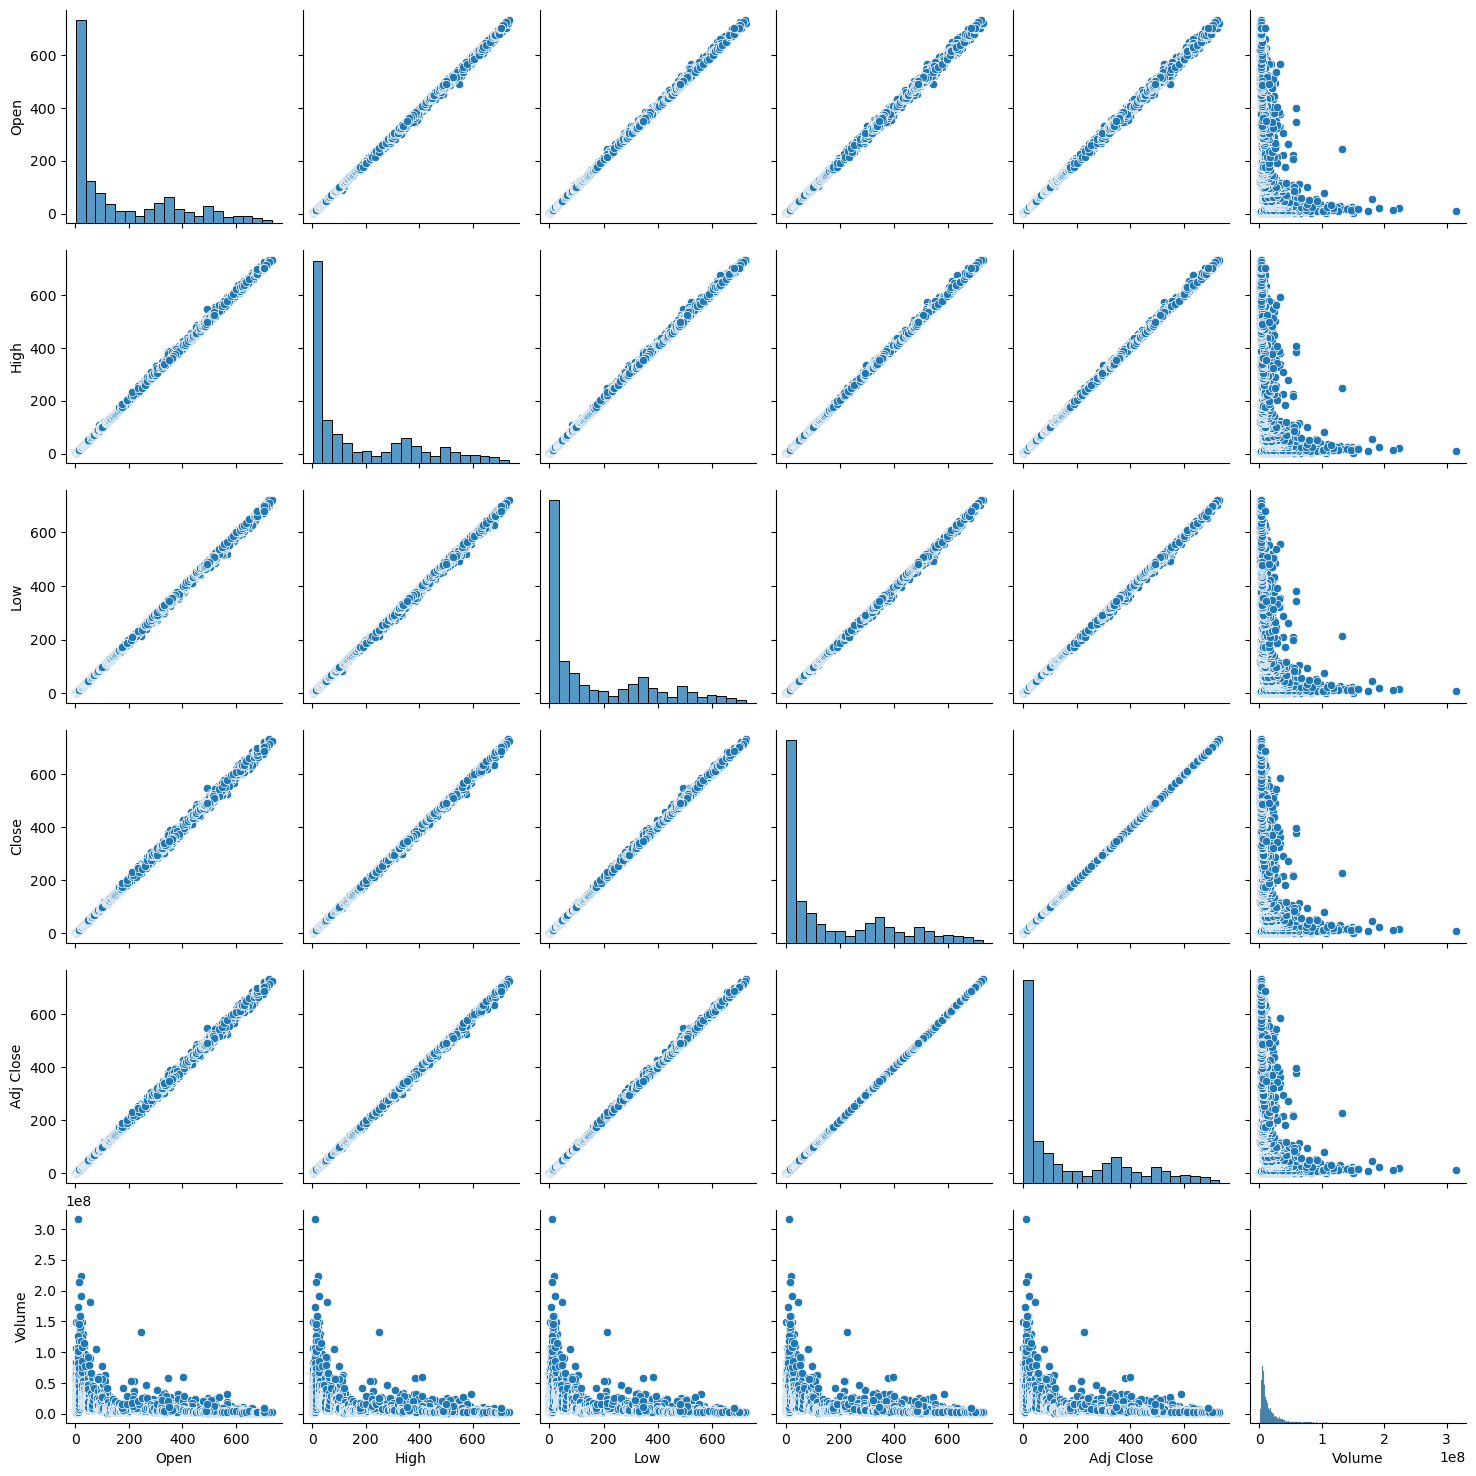

In [34]:
sns.pairplot(df_Netflix[['Open','High','Low','Close','Adj Close','Volume']])
plt.show()

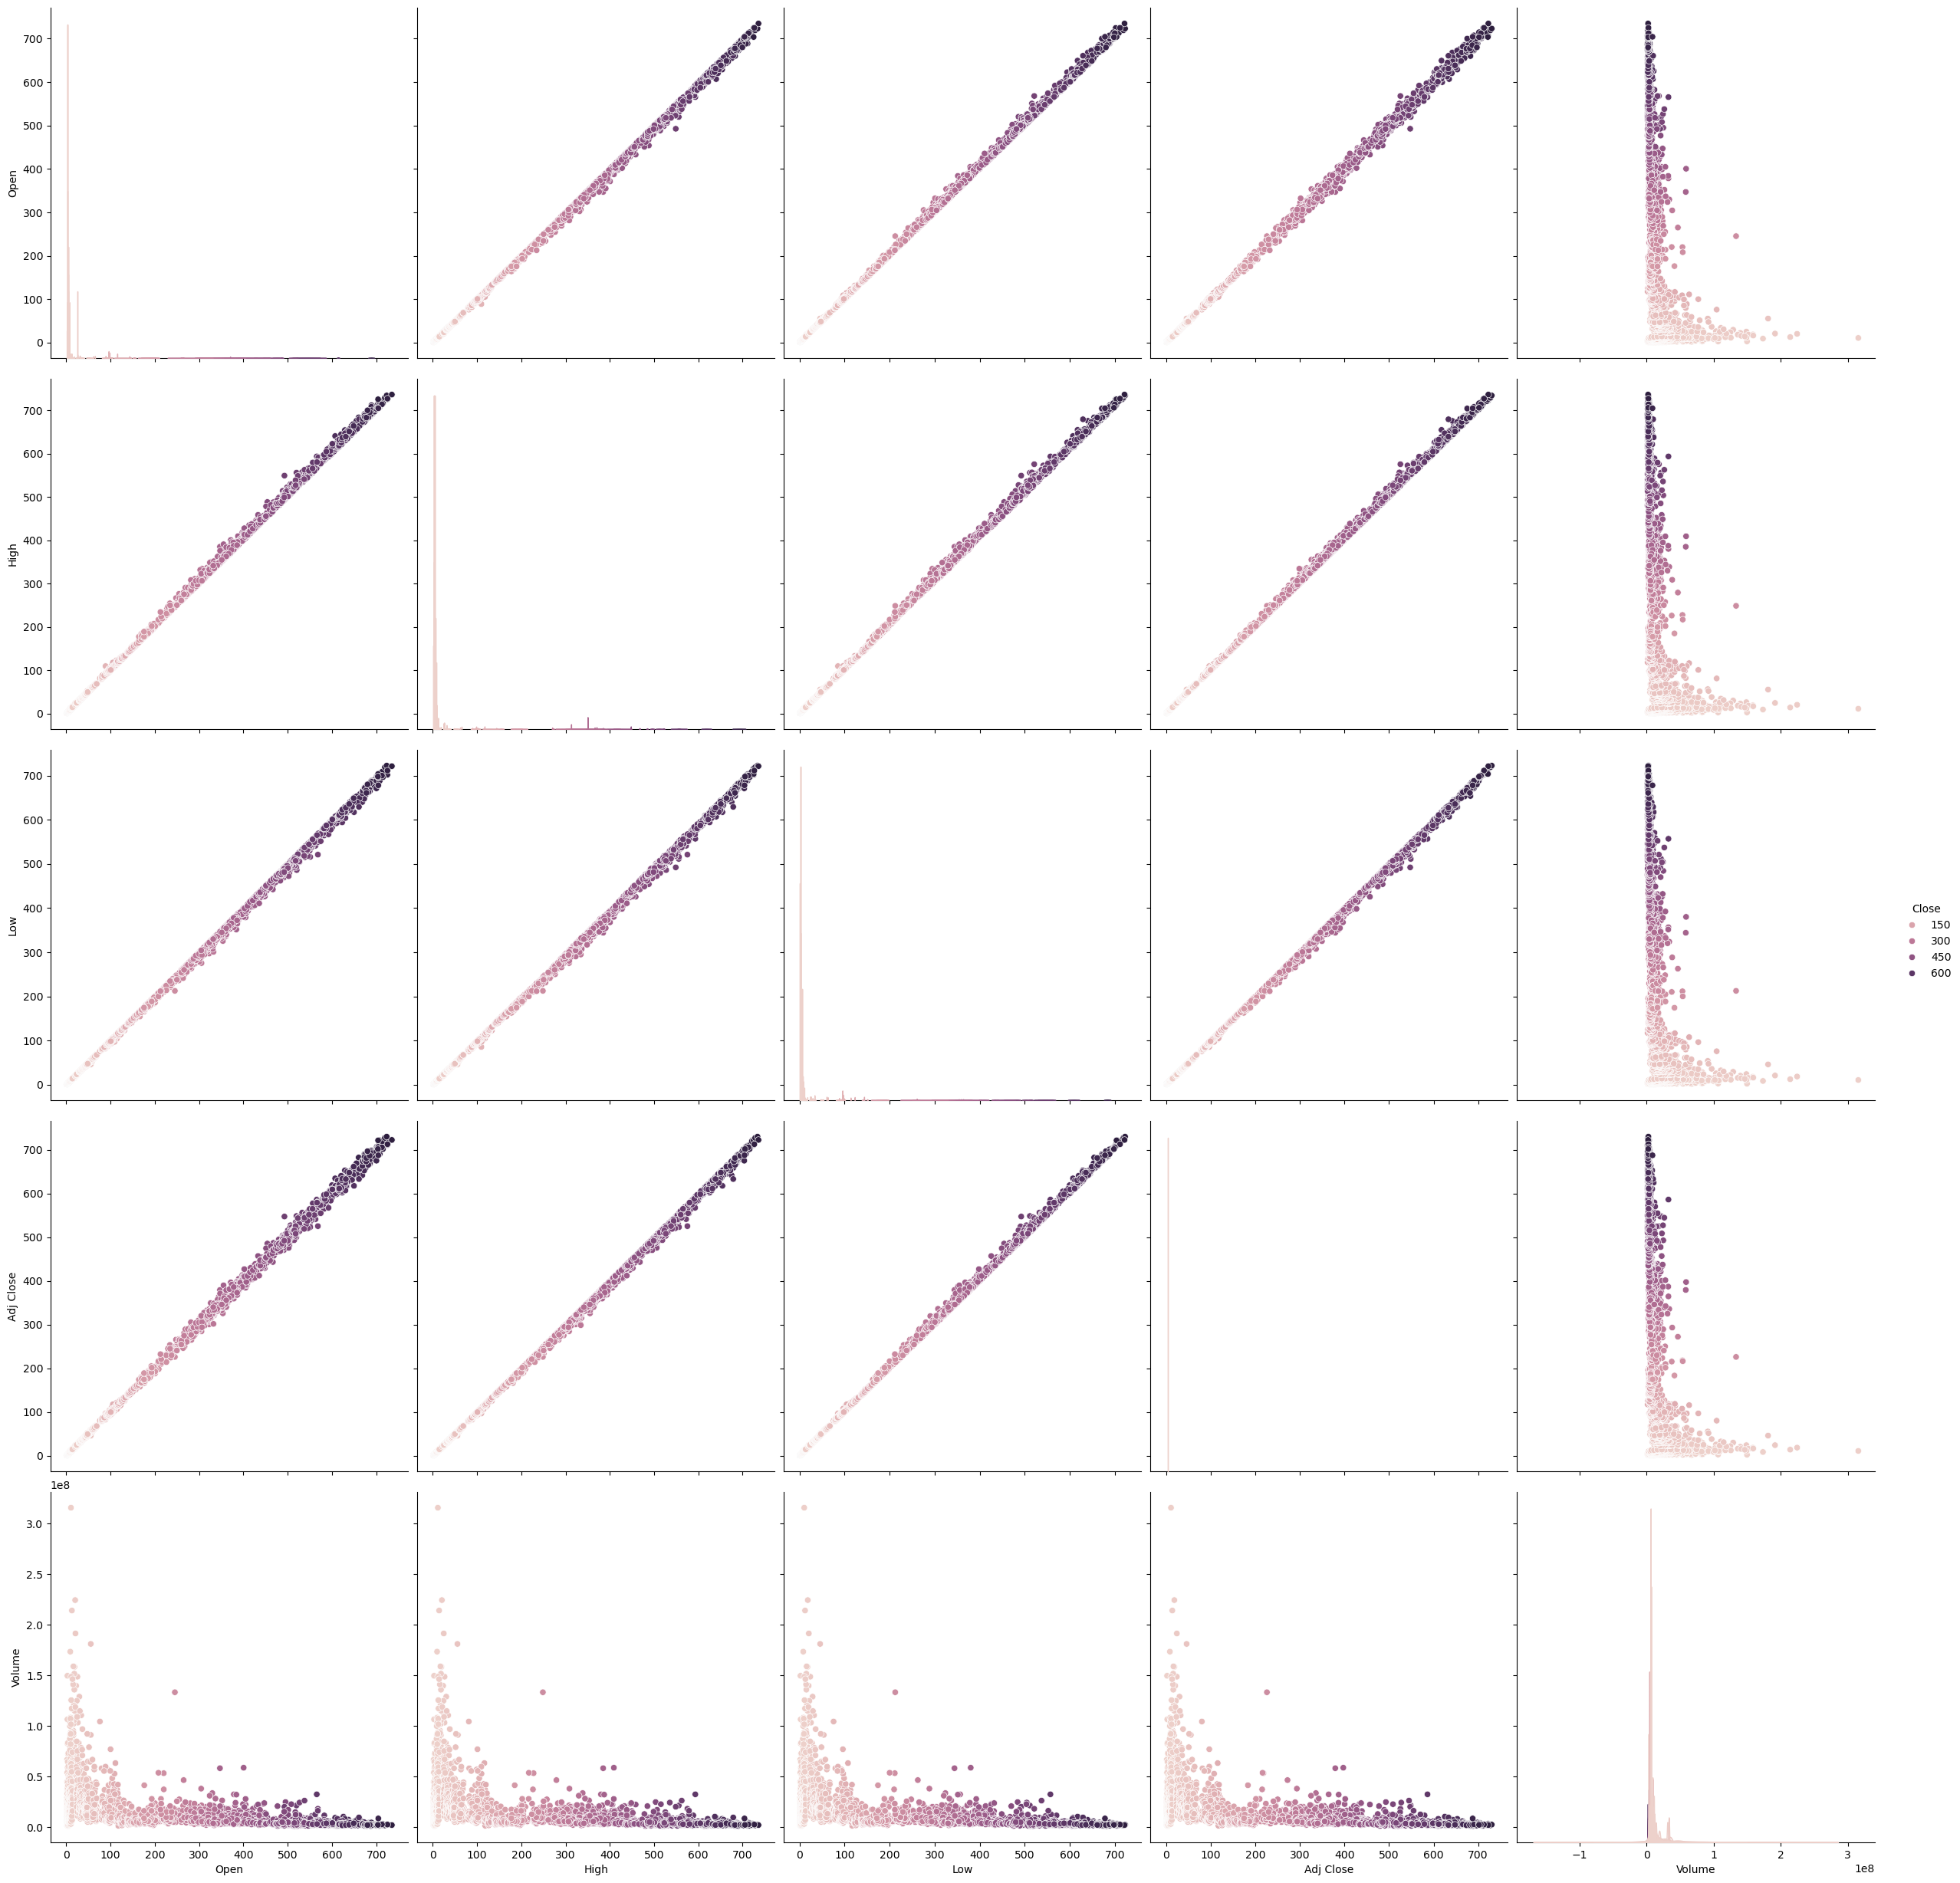

In [41]:
sns.pairplot(df_Netflix[['Open','High','Low','Close','Adj Close','Volume']], hue='Close', height=5)
plt.show()

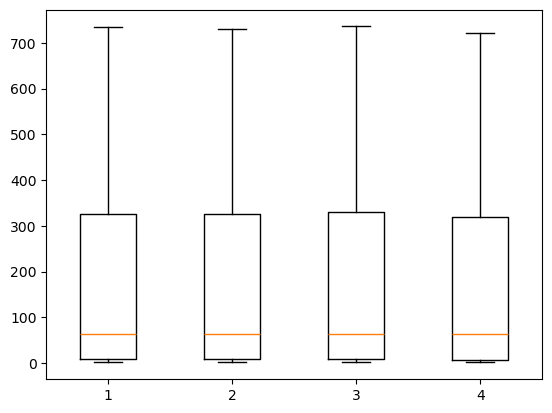

In [7]:
plt.boxplot(df_Netflix[['Open','Close','High','Low']])
plt.show()

Text(0.5, 1.0, 'Close Distribution')

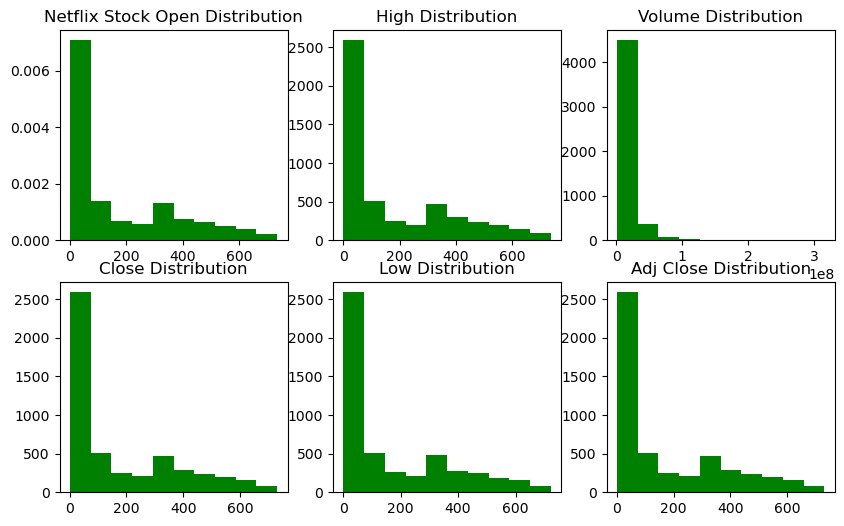

In [8]:
fig, ax = plt.subplots(nrows = 2, ncols=3, figsize=(10,6))

ax[0,0].hist(df_Netflix['Open'], bins=10, color='green', density=True)
ax[0,0].set_title("Netflix Stock Open Distribution")

ax[0,1].hist(df_Netflix['High'], bins=10, color='green')
ax[0,1].set_title("High Distribution")

ax[0,2].hist(df_Netflix['Volume'], bins=10, color='green')
ax[0,2].set_title("Volume Distribution")

ax[1,2].hist(df_Netflix['Adj Close'], bins=10, color='green')
ax[1,2].set_title("Adj Close Distribution")

ax[1,1].hist(df_Netflix['Low'], bins=10, color='green')
ax[1,1].set_title("Low Distribution")

ax[1,0].hist(df_Netflix['Close'], bins=10, color='green')
ax[1,0].set_title("Close Distribution")

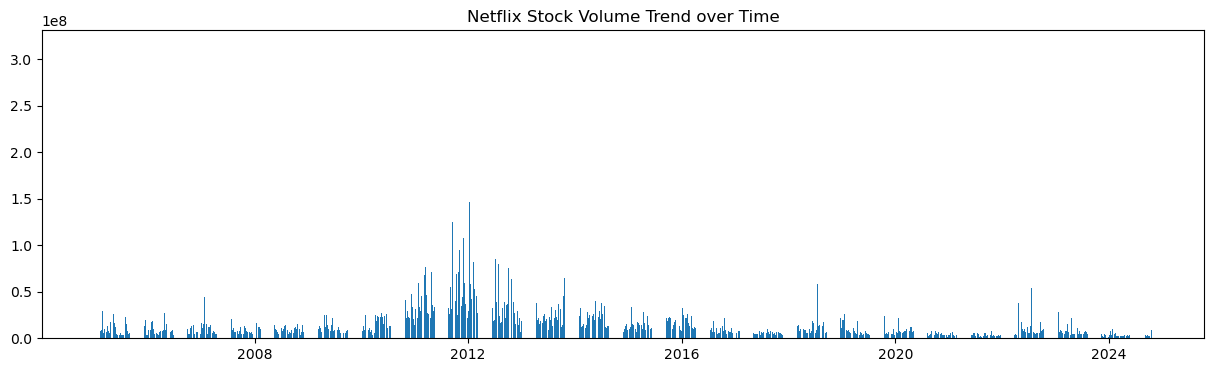

In [9]:
plt.figure(figsize=(15,4))
plt.bar(df_Netflix['Date'], df_Netflix['Volume'])
plt.title("Netflix Stock Volume Trend over Time")
plt.show()

Text(0.5, 1.0, 'Adjust Close Trend')

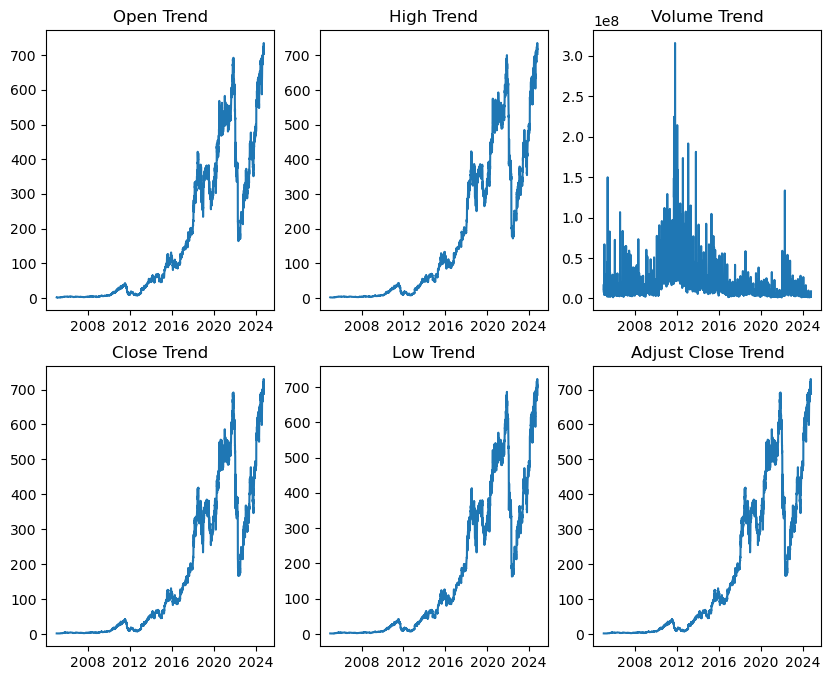

In [10]:
fig, ax = plt.subplots(nrows = 2, ncols=3, figsize=(10,8))

ax[0,0].plot(df_Netflix['Date'], df_Netflix['Open'])
ax[0,0].set_title("Open Trend")

ax[0,1].plot(df_Netflix['Date'], df_Netflix['High'])
ax[0,1].set_title("High Trend")

ax[0,2].plot(df_Netflix['Date'], df_Netflix['Volume'])
ax[0,2].set_title("Volume Trend")


ax[1,0].plot(df_Netflix['Date'], df_Netflix['Close'])
ax[1,0].set_title("Close Trend")

ax[1,1].plot(df_Netflix['Date'], df_Netflix['Low'])
ax[1,1].set_title("Low Trend")

ax[1,2].plot(df_Netflix['Date'], df_Netflix['Adj Close'])
ax[1,2].set_title("Adjust Close Trend")

In [5]:
X = df_Netflix[['Open','High','Low','Adj Close']]
y = df_Netflix['Close']

In [6]:
X_train_size = int(len(X) * 0.8)
X_train_data = X[:X_train_size]
X_test_data = X[X_train_size:]
print("X_train length: ",len(X_train_data))
print("X_test length: ",len(X_test_data))

y_train_size = int(len(y) * 0.8)
y_train_data = y[:y_train_size]
y_test_data = y[y_train_size:]
print("y_train length: ",len(y_train_data))
print("y_test length: ",len(y_test_data))

X_train length:  3985
X_test length:  997
y_train length:  3985
y_test length:  997


#### Linear Regression

In [7]:
LR_mdl_net = LinearRegression()
LR_mdl_net.fit(X_train_data, y_train_data)
df_y_pred = LR_mdl_net.predict(X)
y_pred = LR_mdl_net.predict(X_test_data)
net_score = LR_mdl_net.score(X_test_data, y_test_data)
net_mae = mean_absolute_error(y_test_data, y_pred)
net_mse = mean_squared_error(y_test_data, y_pred)
net_rmse = root_mean_squared_error(y_test_data, y_pred)
net_r2 = r2_score(y_test_data, y_pred)
print("netflix Stock Linear Regression:")
print(f"Score Value :{net_score}")
print(f"Mean Absolute Error_MAE:{net_mae}")
print(f"Mean Squared Error_MSE:{net_mse}")
print(f"Root Mean Squared Error_RMSE:{net_rmse}")
print(f"R-Squared_ R2:{net_r2}")

netflix Stock Linear Regression:
Score Value :1.0
Mean Absolute Error_MAE:5.3964188517306704e-14
Mean Squared Error_MSE:4.5980225601006454e-27
Root Mean Squared Error_RMSE:6.780872038389048e-14
R-Squared_ R2:1.0


In [8]:
linear_params = LR_mdl_net.get_params()
linear_params

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

##### Save the Linear Regression model

In [9]:
with open("linear_model.pkl", "wb") as f:
    pickle.dump(LR_mdl_net,f)

In [10]:
df_Netflix['Close Prediction']= df_y_pred


C:\Users\moort\AppData\Local\Temp\ipykernel_27636\2097105777.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Netflix['Close Prediction']= df_y_pred


In [11]:
df_Netflix.to_excel("data_with_prediction.xlsx")

#### Decision Tree

In [15]:
DT_mdl_net = tree.DecisionTreeRegressor()
DT_mdl_net.fit(X_train_data, y_train_data)
y_pred_dt = DT_mdl_net.predict(X_test_data)

dt_score_net = DT_mdl_net.score(X_test_data, y_test_data)
dt_mae_net = mean_absolute_error(y_test_data, y_pred_dt)
dt_mse_net = mean_squared_error(y_test_data, y_pred_dt)
dt_rmse_net = root_mean_squared_error(y_test_data, y_pred_dt)
dt_r2_net = r2_score(y_test_data, y_pred_dt)
print("Netflix Stock DecisionTree Regression:")
print(f"Score Value :{dt_score_net}")
print(f"Mean Absolute Error_MAE:{dt_mae_net}")
print(f"Mean Squared Error_MSE:{dt_mse_net}")
print(f"Root Mean Squared Error_RMSE:{dt_rmse_net}")
print(f"R-Squared_ R2:{dt_r2_net}")

Netflix Stock DecisionTree Regression:
Score Value :0.8994712485315016
Mean Absolute Error_MAE:22.14226097793379
Mean Squared Error_MSE:2169.408078630004
Root Mean Squared Error_RMSE:46.57690499195931
R-Squared_ R2:0.8994712485315016


In [16]:
DT_params = DT_mdl_net.get_params()
DT_params

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

#### RandomForest

In [17]:
RF_mdl_net = RandomForestRegressor(n_estimators=100)
RF_mdl_net.fit(X_train_data, y_train_data)
y_pred_rf = RF_mdl_net.predict(X_test_data)

rf_score_net = RF_mdl_net.score(X_test_data, y_test_data)
rf_mae_net = mean_absolute_error(y_test_data, y_pred_dt)
rf_mse_net = mean_squared_error(y_test_data, y_pred_dt)
rf_rmse_net = root_mean_squared_error(y_test_data, y_pred_dt)
rf_r2_net = r2_score(y_test_data, y_pred_dt)
print("Netflix Stock RandomForest Regression:")
print(f"Score Value :{rf_score_net}")
print(f"Mean Absolute Error_MAE:{rf_mae_net}")
print(f"Mean Squared Error_MSE:{rf_mse_net}")
print(f"Root Mean Squared Error_RMSE:{rf_rmse_net}")
print(f"R-Squared_ R2:{rf_r2_net}")

Netflix Stock RandomForest Regression:
Score Value :0.8929844657857886
Mean Absolute Error_MAE:22.14226097793379
Mean Squared Error_MSE:2169.408078630004
Root Mean Squared Error_RMSE:46.57690499195931
R-Squared_ R2:0.8994712485315016


In [18]:
RF_params = RF_mdl_net.get_params()
RF_params

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

#### Gradient Boosting

In [38]:
X_test_data.values

array([[502.0100098, 505.8800049, 472.2099915, 475.7399902],
       [478.8699951, 486.2999878, 475.       , 484.1199951],
       [484.9299927, 495.3099976, 478.7600098, 487.2200012],
       ...,
       [712.5100098, 713.4000244, 699.7800293, 705.9799805],
       [703.4299927, 705.5900269, 697.8200073, 702.       ],
       [704.3499756, 704.4099731, 677.8800049, 687.6500244]])

In [12]:
GB_mdl_net = GradientBoostingRegressor(n_estimators=100, learning_rate=1.0)
GB_mdl_net.fit(X_train_data, y_train_data)
y_pred_gb = GB_mdl_net.predict(X_test_data)

gb_score_net = GB_mdl_net.score(X_test_data, y_test_data)
gb_mae_net = mean_absolute_error(y_test_data, y_pred_gb)
gb_mse_net = mean_squared_error(y_test_data, y_pred_gb)
gb_rmse_net = root_mean_squared_error(y_test_data, y_pred_gb)
gb_r2_net = r2_score(y_test_data, y_pred_gb)
print("Netflix Stocks GradientBoosting Regression:")
print(f"Score Value :{gb_score_net}")
print(f"Mean Absolute Error_MAE:{gb_mae_net}")
print(f"Mean Squared Error_MSE:{gb_mse_net}")
print(f"Root Mean Squared Error_RMSE:{gb_rmse_net}")
print(f"R-Squared_ R2:{gb_r2_net}")


Netflix Stocks GradientBoosting Regression:
Score Value :0.8997428908542515
Mean Absolute Error_MAE:23.16103233491276
Mean Squared Error_MSE:2163.5460437309025
Root Mean Squared Error_RMSE:46.513933866433
R-Squared_ R2:0.8997428908542515


In [13]:
GB_params = GB_mdl_net.get_params()
GB_params

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 1.0,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

#### Hyperparameter Tuning RandomForest

##### RandomForestRegressor

In [14]:
rf_mdl = RandomForestRegressor(random_state=17)

In [15]:
rf_params_1 = {"max_depth": [5, 10, 15, 20, None],
             "max_features": ['sqrt', 'log2'],
             "min_samples_split": [2, 5, 10, 20],
             "n_estimators": [50, 100, 150, 200]}

In [16]:
rf_grid_1 = GridSearchCV(rf_mdl, rf_params_1, cv=5, n_jobs=-1, verbose=1).fit(X_train_data, y_train_data)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


In [17]:
best_params = rf_grid_1.best_params_
best_params

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 200}

In [18]:
rf_final_1 = rf_mdl.set_params(**best_params, random_state=17).fit(X_train_data, y_train_data)

In [19]:
y_pred_GCV = rf_final_1.predict(X_test_data)

In [20]:
rfCV_score_net = rf_final_1.score(X_test_data, y_test_data)
rfCV_mae_net = mean_absolute_error(y_test_data, y_pred_GCV)
rfCV_mse_net = mean_squared_error(y_test_data, y_pred_GCV)
rfCV_rmse_net = root_mean_squared_error(y_test_data, y_pred_GCV)
rfCV_r2_net = r2_score(y_test_data, y_pred_GCV)

In [28]:
print("Netflix Stocks GridSearchCV-RandomForest Regression:")
print(f"Score Value :{rfCV_score_net}")
print(f"Mean Absolute Error_MAE:{rfCV_mae_net}")
print(f"Mean Squared Error_MSE:{rfCV_mse_net}")
print(f"Root Mean Squared Error_RMSE:{rfCV_rmse_net}")
print(f"R-Squared_ R2:{rfCV_r2_net}")

Netflix Stocks GridSearchCV-RandomForest Regression:
Score Value :0.8819932172019136
Mean Absolute Error_MAE:24.64059436878899
Mean Squared Error_MSE:2546.583581270543
Root Mean Squared Error_RMSE:50.463685767792896
R-Squared_ R2:0.8819932172019136


In [26]:
rf_grid_2 = GridSearchCV(rf_mdl, rf_params_1, cv=3, n_jobs=-1, verbose=1).fit(X_train_data, y_train_data)

Fitting 3 folds for each of 160 candidates, totalling 480 fits


KeyboardInterrupt: 

In [31]:
best_params_2 = rf_grid_2.best_params_
best_params_2

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 50}

In [32]:
rf_final_2 = rf_mdl.set_params(**best_params_2, random_state=17).fit(X_train_data, y_train_data)

In [33]:
y_pred_GCV_2 = rf_final_2.predict(X_test_data)

In [34]:
rfCV2_score_net = rf_final_2.score(X_test_data, y_test_data)
rfCV2_mae_net = mean_absolute_error(y_test_data, y_pred_GCV_2)
rfCV2_mse_net = mean_squared_error(y_test_data, y_pred_GCV_2)
rfCV2_rmse_net = root_mean_squared_error(y_test_data, y_pred_GCV_2)
rfCV2_r2_net = r2_score(y_test_data, y_pred_GCV_2)

In [35]:
print("Netflix Stocks GridSearchCV_2-RandomForest Regression:")
print(f"Score Value :{rfCV2_score_net}")
print(f"Mean Absolute Error_MAE:{rfCV2_mae_net}")
print(f"Mean Squared Error_MSE:{rfCV2_mse_net}")
print(f"Root Mean Squared Error_RMSE:{rfCV2_rmse_net}")
print(f"R-Squared_ R2:{rfCV2_r2_net}")

Netflix Stocks GridSearchCV_2-RandomForest Regression:
Score Value :0.8802296269000314
Mean Absolute Error_MAE:24.874743684028054
Mean Squared Error_MSE:2584.6418182665107
Root Mean Squared Error_RMSE:50.83937271708327
R-Squared_ R2:0.8802296269000314


#### ML Flow

In [29]:
import mlflow

In [ ]:
mlflow.set_experiment("Stock Price Prediction")
mlflow.set_tracking_uri("http://127.0.0.1:5000")

In [38]:
with mlflow.start_run():
    mlflow.log_params(GB_params)
    mlflow.log_metric('mae', gb_mae_net)
    mlflow.log_metric('mse', gb_mse_net)
    mlflow.log_metric('rmse', gb_rmse_net)
    mlflow.log_metric('r2', gb_r2_net)

    mlflow.sklearn.log_model(GB_mdl_net, "Gradient Boosting Regressor")

2025/01/26 15:54:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run inquisitive-lamb-434 at: http://127.0.0.1:5000/#/experiments/184744643213117148/runs/49a40d381acf45f091e24e2e15670ecf
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/184744643213117148


In [39]:
with mlflow.start_run():
    mlflow.log_params(best_params_2)
    mlflow.log_metric('mae', rfCV2_mae_net)
    mlflow.log_metric('mse', rfCV2_mse_net)
    mlflow.log_metric('rmse', rfCV2_rmse_net)
    mlflow.log_metric('r2', rfCV2_r2_net)

    mlflow.sklearn.log_model(rf_final_2, "Random Forest Regressor")

2025/01/26 15:54:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run peaceful-crane-810 at: http://127.0.0.1:5000/#/experiments/184744643213117148/runs/f4149aa12bbf4089ab96680c0ebc939b
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/184744643213117148


In [ ]:

with mlflow.start_run():
    mlflow.log_params(DT_params)
    mlflow.log_metric('mae', dt_mae_net)
    mlflow.log_metric('mse', dt_mse_net)
    mlflow.log_metric('rmse', dt_rmse_net)
    mlflow.log_metric('r2', dt_r2_net)

    mlflow.sklearn.log_model(DT_mdl_net, "Decision Tree Regressor")

2025/01/26 15:54:25 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run enthused-deer-244 at: http://127.0.0.1:5000/#/experiments/184744643213117148/runs/bb5c1a5f8de7485388b4bb951f453836
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/184744643213117148


In [ ]:

with mlflow.start_run():
    mlflow.log_params(linear_params)
    mlflow.log_metric('mae', net_mae)
    mlflow.log_metric('mse', net_mse)
    mlflow.log_metric('rmse', net_rmse)
    mlflow.log_metric('r2', net_r2)

    mlflow.sklearn.log_model(LR_mdl_net, "Linear Regression")

2025/01/26 15:54:30 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run amazing-sponge-124 at: http://127.0.0.1:5000/#/experiments/184744643213117148/runs/0a3794e3aac34e65a99931b44b9989d5
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/184744643213117148


#### Model Registration

In [ ]:
model_name = "Gradient Boosting Regressor"
#run_id = input("Please enter run id")
#run_id = "c72283c271304414b17981f461acc99b"
model_uri = f'runs:/c72283c271304414b17981f461acc99b/model_name'

with mlflow.start_run(run_id=c72283c271304414b17981f461acc99b):
    mlflow.register_model(model_uri=model_uri, model_name=model_name)

#### Load and Test the model

In [27]:
import mlflow.pyfunc

In [31]:
model_name = "GRADIENT BOOSTING - STOCK"
model_version = 1

model = mlflow.pyfunc.load_model(model_uri=f'models:/{model_name}/{model_version}')

In [41]:
y_pred = model.predict([[502.0100098, 505.8800049, 472.2099915, 475.7399902]])
y_pred

c:\Users\moort\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([477.16346087])

#### Transition the model to the production

In [42]:
client = mlflow.MlflowClient()
client.copy_model_version(src_model_uri=f'models:/{model_name}/{model_version}', dst_name="GRADIENT BOOSTING - STOCK")


Registered model 'GRADIENT BOOSTING - STOCK' already exists. Creating a new version of this model...
Copied version '1' of model 'GRADIENT BOOSTING - STOCK' to version '2' of model 'GRADIENT BOOSTING - STOCK'.


<ModelVersion: aliases=[], creation_timestamp=1737982641805, current_stage='None', description='', last_updated_timestamp=1737982641805, name='GRADIENT BOOSTING - STOCK', run_id='c72283c271304414b17981f461acc99b', run_link='', source='models:/GRADIENT BOOSTING - STOCK/1', status='READY', status_message=None, tags={}, user_id=None, version=2>

#### Model Deployment

In [2]:
import dagshub
dagshub.init(repo_owner='chitra1985', repo_name='Ml-Flow', mlflow=True)


❗❗❗ AUTHORIZATION REQUIRED ❗❗❗

Output()



Open the following link in your browser to authorize the client:
https://dagshub.com/login/oauth/authorize?state=1d31b03a-ec02-4300-88d0-e1954f7075a5&client_id=32b60ba385aa7cecf24046d8195a71c07dd345d9657977863b52e7748e0f0f28&middleman_request_id=b5cd2140d6426844dbc9fe4ab83393b806af02b0a393bde647b401deefabaaac




Accessing as chitra1985

Initialized MLflow to track repo "chitra1985/Ml-Flow"

Repository chitra1985/Ml-Flow initialized!

In [30]:
mlflow.set_experiment("Stock Price Prediction")
mlflow.set_tracking_uri("https://dagshub.com/chitra1985/Ml-Flow.mlflow")

2025/01/28 15:15:47 INFO mlflow.tracking.fluent: Experiment with name 'Stock Price Prediction' does not exist. Creating a new experiment.


In [31]:
with mlflow.start_run():
    mlflow.log_params(GB_params)
    mlflow.log_metric('mae', gb_mae_net)
    mlflow.log_metric('mse', gb_mse_net)
    mlflow.log_metric('rmse', gb_rmse_net)
    mlflow.log_metric('r2', gb_r2_net)

    mlflow.sklearn.log_model(GB_mdl_net, "Gradient Boosting Regressor")

2025/01/28 15:15:53 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh()

All git commands will error until this is rectified.

This initial warning can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|none|n|0: for no warning or exception
    - warn|w|warning|1: for a printed warning
    - error|e|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet

2025/01/28 15:16:04 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run vaunted-stag-344 at: https://dagshub.com/chitra1985/Ml-Flow.mlflow/#/experiments/0/runs/25490c328b994668b4b514ba93308bf3
🧪 View experiment at: https://dagshub.com/chitra1985/Ml-Flow.mlflow/#/experiments/0


In [33]:
with mlflow.start_run():
    mlflow.log_params(best_params)
    mlflow.log_metric('mae', rfCV_mae_net)
    mlflow.log_metric('mse', rfCV_mse_net)
    mlflow.log_metric('rmse', rfCV_rmse_net)
    mlflow.log_metric('r2', rfCV_r2_net)

    mlflow.sklearn.log_model(rf_final_1, "Random Forest Regressor")

2025/01/28 15:19:43 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run delicate-roo-948 at: https://dagshub.com/chitra1985/Ml-Flow.mlflow/#/experiments/0/runs/486fd58141de46569fb36edc0f3bfe4a
🧪 View experiment at: https://dagshub.com/chitra1985/Ml-Flow.mlflow/#/experiments/0


#### Streamlit App

In [1]:
import streamlit as st


In [21]:
import streamlit as st
import pickle
import pandas as pd
import numpy as np

st.title("Stock Price Prediction App")

# Load the trained model from the pickle file
with open('linear_model.pkl', 'rb') as file:
    Netmodel = pickle.load(file)

with open('linear_model_amazon.pkl', 'rb') as file:
    Amazmodel = pickle.load(file)

with open('linear_model_apple.pkl', 'rb') as file:
    Appmodel = pickle.load(file)

with open('linear_model_fb.pkl', 'rb') as file:
    FBmodel = pickle.load(file)

with open('linear_model_goo.pkl', 'rb') as file:
    Goomodel = pickle.load(file)


def preprocess_input(user_input):
    user_input = np.array(user_input).reshape(1, -1)
    return user_input

# Make prediction
def predict(model, data):
    prediction = model.predict(data)
    return prediction


col_route, col_table = st.columns([1,2])

with col_route:
    def main():
        

        # User input (example)
        Options = ['Apple', 'Amazon', 'Facebook', 'Google', 'Netflix']
        company = st.selectbox("Select an Option :", Options)
        open_price = st.number_input("Open Price")
        high_price = st.number_input("High Price")
        low_price = st.number_input("Low Price")
        Adj_close_price = st.number_input("Adj Close Price")
        
        #volume = st.number_input("Volume")

        # Create input data
        user_input_data = np.array([[open_price, high_price, low_price, Adj_close_price]])

        # Preprocess input
        preprocessed_data = preprocess_input(user_input_data)

        # Make prediction
        if st.button("Predict"):
            if open_price <= 0 and high_price <=0 and low_price <=0 and Adj_close_price <= 0:
                with col_table:
                    st.warning("Enter the values properly")
            else:
                if company == 'Netflix':
                    predicted_price = predict(Netmodel, preprocessed_data)
                    with col_table:
                        st.success(f"Predicted Price: {predicted_price[0]}")
                elif company == 'Apple':
                    predicted_price = predict(Appmodel, preprocessed_data)
                    with col_table:
                        st.success(f"Predicted Price: {predicted_price[0]}")
                elif company == 'Amazon':
                    predicted_price = predict(Amazmodel, preprocessed_data)
                    with col_table:
                        st.success(f"Predicted Price: {predicted_price[0]}")
                elif company == 'Google':
                    predicted_price = predict(Goomodel, preprocessed_data)
                    with col_table:
                        st.success(f"Predicted Price: {predicted_price[0]}")
                elif company == 'Facebook':
                    predicted_price = predict(FBmodel, preprocessed_data)
                    with col_table:
                        st.success(f"Predicted Price: {predicted_price[0]}")
                else:
                    with col_table:
                        st.write("select company")

    if __name__ == "__main__":
        main()